# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.579  1  1.142 0.287 0.006   
                             age        0.106  1  0.210 0.647 0.001   
                             Kiel       1.816  1  3.580 0.060 0.018   
                             Magdeburg  3.826  1  7.543 0.007 0.038   
                             Sweden     6.274  1 12.369 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.510  1  0.556 0.457 0.003   
                             age        0.799  1  0.870 0.352 0.005   
                             Kiel       0.120  1  0.131 0.718 0.001   
                             Magdeburg  2.802  1  3.052 0.082 0.016   
                             Sweden    17.492  1 19.050 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.543  0.449    False  
                             age               0.189  0.769    False  
                             Kiel              1.222  0.139    False  
                             Magdeburg         2.180  0.024     True  
                             Sweden            3.263  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.340  0.610    False  
                             age               0.453  0.515    False  
                             Kiel              0.144  0.819    False  
                             Magdeburg         1.085  0.179    False  
                             Sweden            4.681  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.088  1  7.890 0.005 0.040   
                             age        0.008  1  0.056 0.813 0.000   
                             Kiel       0.276  1  2.004 0.159 0.010   
                             Magdeburg  0.454  1  3.292 0.071 0.017   
                             Sweden     1.650  1 11.969 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.284  1  4.276 0.040 0.022   
                             age        0.495  1  0.927 0.337 0.005   
                             Kiel       2.495  1  4.669 0.032 0.024   
                             Magdeburg  2.412  1  4.514 0.035 0.023   
                             Sweden    17.057  1 31.926 0.000 0.143   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.261  0.016     True  
                             age               0.090  0.874    False  
                             Kiel              0.800  0.261    False  
                             Magdeburg         1.148  0.137    False  
                             Sweden            3.176  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.398  0.085    False  
                             age               0.472  0.467    False  
                             Kiel              1.496  0.071    False  
                             Magdeburg         1.457  0.076    False  
                             Sweden            7.240  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.287         0.543  0.449    False   
                             Kiel      0.060         1.222  0.139    False   
                             Magdeburg 0.007         2.180  0.024     True   
                             Sweden    0.001         3.263  0.003     True   
                             age       0.647         0.189  0.769    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.457         0.340  0.610    False   
                             Kiel      0.718         0.144  0.819    False   
                             Magdeburg 0.082         1.085  0.179    False   
                             Sweden    0.000         4.681  0.000     True   
                             age       0.352         0.453  0.515    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.261  0.016     True  
                             Kiel      0.159         0.800  0.261    False  
                             Magdeburg 0.071         1.148  0.137    False  
                             Sweden    0.001         3.176  0.003     True  
                             age       0.813         0.090  0.874    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.040         1.398  0.085    False  
                             Kiel      0.032         1.496  0.071    False  
                             Magdeburg 0.035         1.457  0.076    False  
                             Sweden    0.000         7.240  0.000     True  
                             age       0.337         0.472  0.467    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.485     0.335     0.223         3.356     0.276
std       0.302         5.346     0.329     0.293         6.327     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.338     0.015     0.000         0.412     0.002
50%       0.119         0.925     0.238     0.058         1.234     0.117
75%       0.459         2.415     0.612     0.388         3.342     0.517
max       1.000       150.257     1.000     0.999        86.534     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_47665/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.287         0.543   
A0A024R0T9;K7ER74;P02655                           AD     0.060         1.219   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.082         1.088   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.517         0.287   
A0A075B6H7                                         AD     0.136         0.866   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.154         0.812   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.308         0.512   
S4R3U6                                             AD     0.457         0.340   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.449    False   
A0A024R0T9;K7ER74;P02655                           AD      0.140    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.178    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.663    False   
A0A075B6H7                                         AD      0.263    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.288    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.472    False   
S4R3U6                                             AD      0.610    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.261   
A0A024R0T9;K7ER74;P02655                           AD     0.028         1.549   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.330         0.481   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.251         0.600   
A0A075B6H7                                         AD     0.004         2.372   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.239         0.622   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.972         0.012   
S4R3U6                                             AD     0.040         1.398   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True  
A0A024R0T9;K7ER74;P02655                           AD      0.064    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.461    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.375    False  
A0A075B6H7                                         AD      0.013     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.249         1.419     0.331     0.236         1.609     0.295
std       0.288         1.626     0.314     0.292         1.842     0.315
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.011         0.364     0.037     0.007         0.386     0.019
50%       0.117         0.932     0.235     0.080         1.095     0.151
75%       0.433         1.943     0.589     0.412         2.173     0.541
max       0.997        21.070     0.998     0.998        20.287     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1022,927


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.287         0.543  0.449   
A0A024R0T9;K7ER74;P02655                           0.060         1.219  0.140   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.082         1.088  0.178   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.517         0.287  0.663   
A0A075B6H7                                         0.136         0.866  0.263   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.154         0.812  0.288   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.308         0.512  0.472   
S4R3U6                                             0.457         0.340  0.610   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.005   
A0A024R0T9;K7ER74;P02655                              False 0.028   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.330   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.251   
A0A075B6H7                                            False 0.004   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.239   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.972   
S4R3U6                                                False 0.040   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.261  0.016   
A0A024R0T9;K7ER74;P02655                                   1.549  0.064   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.481  0.461   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.600  0.375   
A0A075B6H7                                                 2.372  0.013   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.283   
Q9Y6X5                                                     0.622  0.361   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.012  0.982   
S4R3U6                                                     1.398  0.085   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    870
PI (yes) - VAE (yes)   342
PI (no)  - VAE (yes)   152
PI (yes) - VAE (no)     57
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_47665/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.287         0.543  0.449    False 0.005   
A0A075B6H7                   0.136         0.866  0.263    False 0.004   
A0A075B6H9                   0.411         0.386  0.571    False 0.020   
A0A075B6J9                   0.100         0.999  0.209    False 0.011   
A0A075B6Q5                   0.556         0.255  0.694    False 0.005   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.016         1.805  0.048     True 0.856   
Q9UP79                       0.285         0.545  0.447    False 0.000   
Q9UQ52                       0.070         1.156  0.157    False 0.001   
Q9Y281;Q9Y281-3              0.344         0.464  0.506    False 0.001   
Q9Y6C2                       0.970         0.013  0.983    False 0.020   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.261  0.016     True       186  
A0A075B6H7                           2.372  0.013     True        91  
A0A075B6H9                           1.695  0.048     True       189  
A0A075B6J9                           1.953  0.029     True       156  
A0A075B6Q5                           2.283  0.015     True       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               0.068  0.906    False       171  
Q9UP79                               4.556  0.000     True       135  
Q9UQ52                               3.287  0.002     True       188  
Q9Y281;Q9Y281-3                      2.921  0.004     True        51  
Q9Y6C2                               1.701  0.048     True       119  

[209 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.449,0.016,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.140,0.064,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.178,0.461,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.663,0.375,196,PI (no) - VAE (no)
A0A075B6H7,0.263,0.013,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.283,197,PI (no) - VAE (no)
Q9Y6X5,0.288,0.361,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.989,0.000,134,PI (no) - VAE (yes),0.989
O00187;O00187-2,0.998,0.024,119,PI (no) - VAE (yes),0.973
Q8N9I0,0.978,0.007,141,PI (no) - VAE (yes),0.970
A6NCT7;Q07092;Q07092-2,0.972,0.002,147,PI (no) - VAE (yes),0.970
P51674;P51674-2;P51674-3,0.980,0.010,55,PI (no) - VAE (yes),0.970
...,...,...,...,...,...
A0A0J9YXX1,0.057,0.047,197,PI (no) - VAE (yes),0.011
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.011
K7ERI9;P02654,0.041,0.052,196,PI (yes) - VAE (no),0.011


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


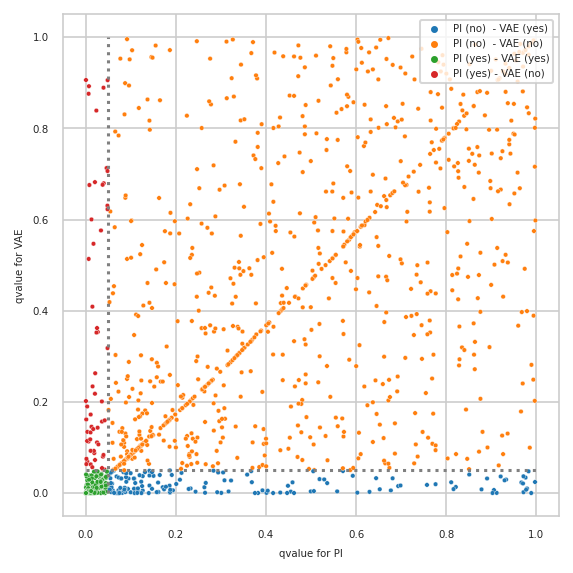

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


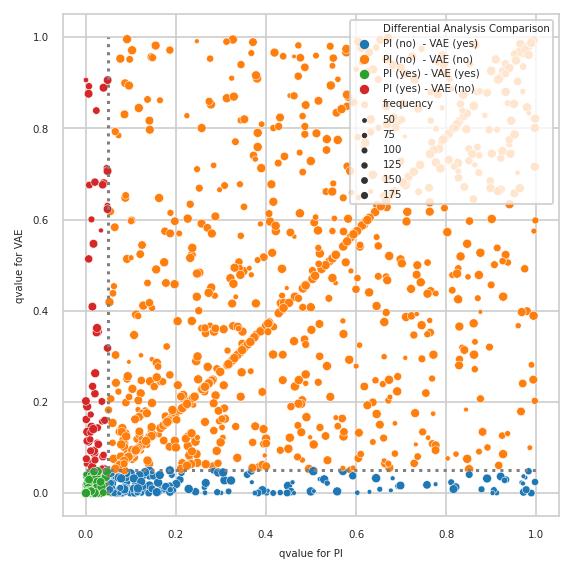

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/c643ee7f4c0bb0357e98a520d824c308_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out